# Ex1 - Practical part
## Multivariate Gaussian's (Question 2.1)
---

Handle imports, using the 3d_gaussian.py helper file (renamed to gausssian_helper)

In [1]:
import gausssian_helper
import numpy as np
import pandas as pd
import matplotlib.projections
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
import scipy.stats as stats

# make prints a little easier to read
np.set_printoptions(precision=2 )

### Data generation
11. Generate random points with normal divergence,
mean of zero and variance of one.
<br/>
(Generating 1500 data points for each axis)
<br/>

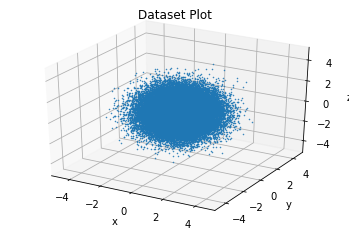

In [2]:
SIZE = 50000
DIM = 3
X = 0
Y = 1
Z = 2
data = np.random.multivariate_normal(np.zeros(DIM), np.eye(DIM), SIZE).T

# plot the dataset for visualization
gausssian_helper.plot_3d(data, "Dataset Plot")

looking at the covariance matrix of the samples:

In [3]:
np.cov(data)

array([[ 0.99, -0.  , -0.  ],
       [-0.  ,  1.01, -0.  ],
       [-0.  , -0.  ,  1.01]])

we can deduce the dataset is of uncorrelated variables with identical variance
(there are roughly zero values off diagonal, and roughly one for the values on the diagonal).

### Scaling transformation
Transform the data with the following scaling matrix: S = diag(.1,.5,2), Plot the new points. What does the covariance matrix look like now (both analytically and
numerically)?


transformation: 
[[0.1 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  2. ]]



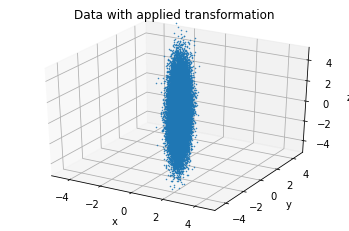

In [4]:
# create the required scaling matrix
s = np.diag([.1,.5,2])
print("transformation: ")
print(s)
print()

# apply the transformation
scaled_data = s @ data

# plot
gausssian_helper.plot_3d(scaled_data, "Data with applied transformation")

Now looking at the covariance matrix:

In [5]:
np.cov(scaled_data)

array([[ 9.92e-03, -7.39e-05, -3.77e-04],
       [-7.39e-05,  2.53e-01, -1.45e-03],
       [-3.77e-04, -1.45e-03,  4.04e+00]])

We can notice that the data point of the X and Y axis compacted while the Z axes
stretched. as the scaling matrix is diagonal, the X,Y and Z axis scaling is uncorrelated, since the
off diagonal elements of the variance matrix are in fact roughly zero.

### Rotation transformation
13. Multiply the scaled data by random orthogonal matrix. Plot the new points. What does the
covariance matrix look like now?

Rotation matrix:
[[-0.82  0.03  0.57]
 [ 0.06 -0.99  0.14]
 [ 0.56  0.15  0.81]]



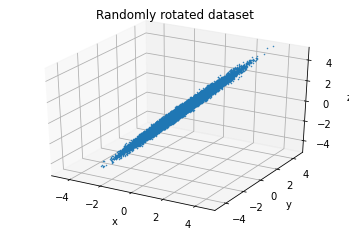

In [6]:
# generate a random orthogonal matrix
orthogonal_transform = gausssian_helper.get_orthogonal_matrix(3)
print("Rotation matrix:")
print(orthogonal_transform)
print()

# apply the transformation
scaled_data = orthogonal_transform @ scaled_data

# plot
gausssian_helper.plot_3d(scaled_data, "Randomly rotated dataset")

next, having a look at the new samples' variance matrix:

In [7]:
print(np.cov(scaled_data))

[[1.31 0.31 1.86]
 [0.31 0.32 0.42]
 [1.86 0.42 2.67]]


We note, as expected, that the orthogonal transformation in fact preformed just a
<b>rotation</b> of the dataset without stretching it.
But, we do notice the covariance matrix indicate there is some correlation
not between the 3 datasets.

### Projection for marginal distribution of a gaussian
14. In recitation, we claimed that the marginal distribution of a gaussian is still gaussian. Plot the
projection of the data to the x, y axes. What does it look like? Add the plot to the submission.

In [8]:
# init projection transformations matrices
X_PROJECTION_MAT = np.diag((1,0,0))
Y_PROJECTION_MAT = np.diag((0,1,0))
X_Y_PROJECTION_MAT = X_PROJECTION_MAT + Y_PROJECTION_MAT

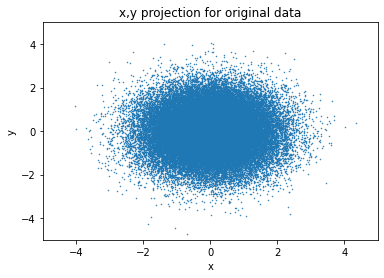

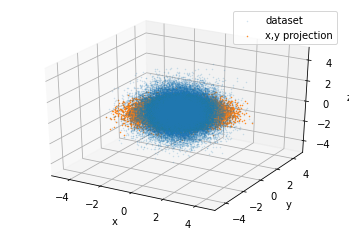

In [9]:

x_proj = X_PROJECTION_MAT @ data
y_proj = Y_PROJECTION_MAT @ data
xy_proj = X_Y_PROJECTION_MAT @ data

# x,y projection for original data
gausssian_helper.plot_2d(xy_proj, "x,y projection for original data")

# plot into 3d projection along with original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0], data[1], data[2], s=1, marker='.', depthshade=False, alpha=0.2, label="dataset")
# ax.scatter(x_proj[0], x_proj[1], x_proj[2], s=1, marker='.', depthshade=False, label="x projection")
# ax.scatter(y_proj[0], y_proj[1], y_proj[2], s=1, marker='.', depthshade=False, label="y projection")
ax.scatter(xy_proj[0], xy_proj[1], xy_proj[2], s=1, marker='.', depthshade=False, label="x,y projection")
ax.legend()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

### Projection for conditional distribution of a gaussian
15. In recitation, we claimed that the conditional distribution of a gaussian is still gaussian. Only
for points where 0.1 > z > −0.4: Plot the projection of the points to the x, y axes. What does
it look like? Add the plot to the submission

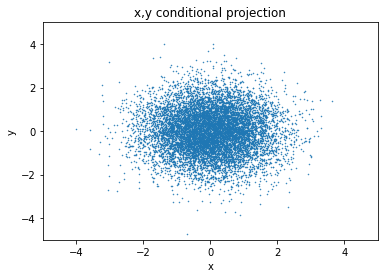

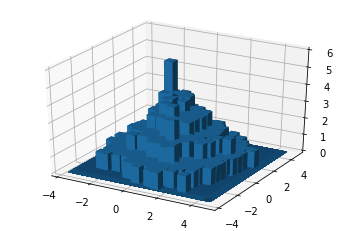

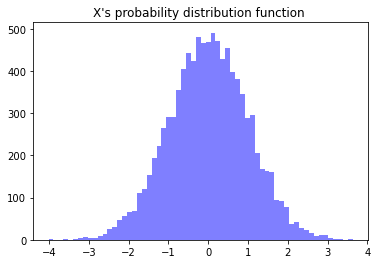

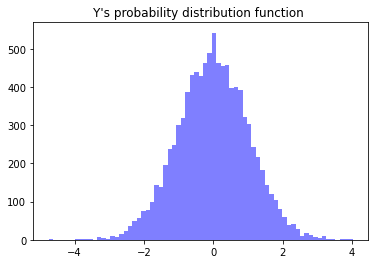

In [10]:
Z_MIN = -.4
Z_MAX = .1

# get the relevant data points from the dataset
conditional_points = np.reshape(data[:,np.where(np.logical_and(Z_MIN < data[Z], data[Z] < Z_MAX))], (3,-1))

# project to x,y
xy_cond_proj = X_Y_PROJECTION_MAT @ conditional_points

# x,y conditional projection
gausssian_helper.plot_2d(xy_cond_proj, "x,y conditional projection")

# bin the data to create a histogram
# plt.figure()
xy = xy_cond_proj[0:2,:]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(xy[X], xy[Y], bins=400, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()


# hist = np.histogram(xy, bins=1000)
# plt.hist(hist[0], hist[1])
plt.figure()
plt.hist(xy[X], bins='auto', facecolor='blue', alpha=0.5)
plt.title("X's probability distribution function ")
plt.figure()
plt.hist(xy[Y], bins='auto', facecolor='blue', alpha=0.5)
plt.title("Y's probability distribution function ")
plt.show()

as expected, the conditional distribution of the data clearly resembles the normal distribution for both
the X and Y axis, and as such seems to indeed be a gaussian.